In [3]:
%matplotlib inline
from SALib.sample import saltelli

# mesa tools import
from mesa.batchrunner import BatchRunner
from SALib.analyze import sobol
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

In [4]:
data = []
for i in range(5):
    data.append(pd.DataFrame())
    for name in ["Thijs", "Rina", "Liza", "Mercylyn", "Tamara"]:
        data[i] = data[i].append(pd.read_csv(f"data/samples_{name}_{i+1}.csv"))

In [10]:
# sobol analysis module
problem = {
    'num_vars': 4,
    'names': ['max_speed', 'vision', 'soc_strength', 'obs_strength'],
    'bounds': [[3, 5], [1, 5], [1000, 3000], [2000, 5000]]
}

def plot_index(s, params, i, title='', col='blue'):
    """
    Creates a plot for Sobol sensitivity analysis that shows the contributions
    of each parameter to the global sensitivity.

    Args:
        s (dict): dictionary {'S#': dict, 'S#_conf': dict} of dicts that hold
            the values for a set of parameters
        params (list): the parameters taken from s
        i (str): string that indicates what order the sensitivity is.
        title (str): title for the plot
        col(str): color for the plot
    """
    plt.figure(figsize=(4,2),dpi=100)
    if i == '2':
        p = len(params)
        params = list(combinations(params, 2))
        indices = s['S' + i].reshape((p ** 2))
        indices = indices[~np.isnan(indices)]
        errors = s['S' + i + '_conf'].reshape((p ** 2))
        errors = errors[~np.isnan(errors)]
    else:
        indices = s['S' + i]
        errors = s['S' + i + '_conf']
        plt.figure()

    l = len(indices)

    plt.title(title,fontsize= 16)
    plt.ylim([-0.2, len(indices) - 1 + 0.2])
    plt.yticks(range(l), params)
    plt.errorbar(indices, range(l), xerr=errors, linestyle='None', marker='o', color = col)
    plt.axvline(0, c='k')
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize= 14)

def plot_first_and_all_order(problem,Si_var,title,color):
    
    # First order
    plot_index(Si_var, problem['names'], '1', f'First order sensitivity for {title}',color)
    plt.show()
    

    # Total order
    plot_index(Si_var, problem['names'], 'T', f'Total order sensitivity for {title}',color)
    plt.show()

def sobol_analysis(data):
    """ Sobol Analysis for one repetition of data """
    Si_mean_exit_time = sobol.analyze(problem, data['Mean exit time'].values,  calc_second_order=False, print_to_console=False)
    # Si_std_exit_time = sobol.analyze(problem, data['std exit time'].values,  calc_second_order=False, print_to_console=False)
    Si_flow = sobol.analyze(problem, data['Flow'].values, calc_second_order=False, print_to_console=False)
    # Si_eva_prec = sobol.analyze(problem, data['Evacuation percentage'].values, calc_second_order=False, print_to_console=False)
    Si_eva_time = sobol.analyze(problem, data['Evacuation time'].values, calc_second_order=False, print_to_console=False)

    measures = [Si_mean_exit_time,Si_flow,Si_eva_time]
    name_measures = ['Mean exit time','Flow','Evacuation time']
    colors = ['red','blue','green']

    for i, Si_var in enumerate(measures):
        print(name_measures[i])
        print('\n')
        print(Si_var)
        plot_first_and_all_order(problem,Si_var,name_measures[i],colors[i])



Mean exit time


{'S1': array([0.06798677, 0.09344295, 0.04654956, 0.2429011 ]), 'S1_conf': array([0.10936675, 0.10748919, 0.09725312, 0.1295922 ]), 'ST': array([0.72028857, 0.79342668, 0.92550541, 0.80977561]), 'ST_conf': array([0.13493812, 0.14699506, 0.154295  , 0.14177359])}


<Figure size 400x200 with 0 Axes>

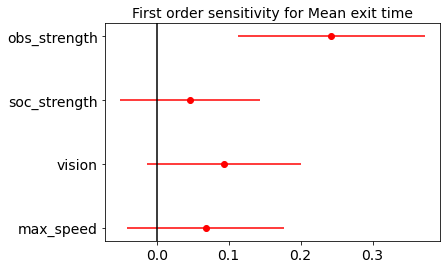

<Figure size 400x200 with 0 Axes>

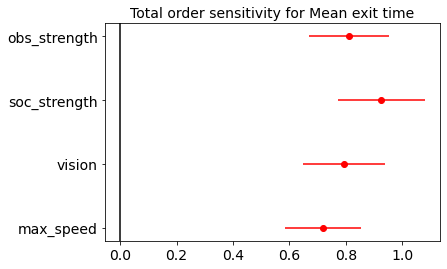

Flow


{'S1': array([ 3.61720052e-05, -1.33660261e-02,  8.13425847e-03,  1.37550226e-01]), 'S1_conf': array([0.12057309, 0.11426008, 0.12426454, 0.11330832]), 'ST': array([0.7057304 , 0.77857517, 0.84981842, 0.80228411]), 'ST_conf': array([0.09625008, 0.11768746, 0.11977863, 0.11227315])}


<Figure size 400x200 with 0 Axes>

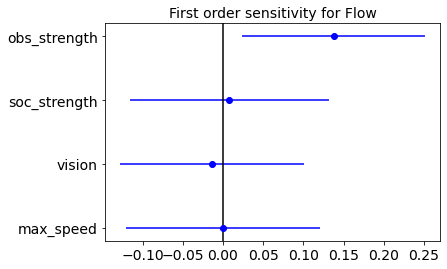

<Figure size 400x200 with 0 Axes>

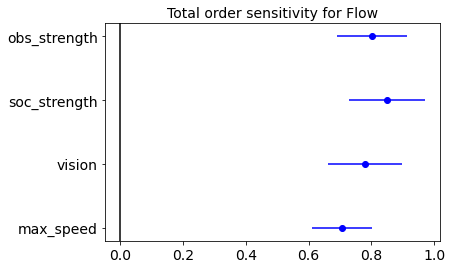

Evacuation time


{'S1': array([0.03799615, 0.01128803, 0.00307267, 0.16506321]), 'S1_conf': array([0.1169755 , 0.11302449, 0.1127588 , 0.13855467]), 'ST': array([0.72152489, 0.79748961, 0.88652415, 0.78586742]), 'ST_conf': array([0.10445856, 0.14061797, 0.15315198, 0.11299285])}


<Figure size 400x200 with 0 Axes>

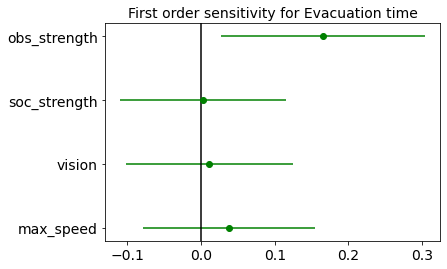

<Figure size 400x200 with 0 Axes>

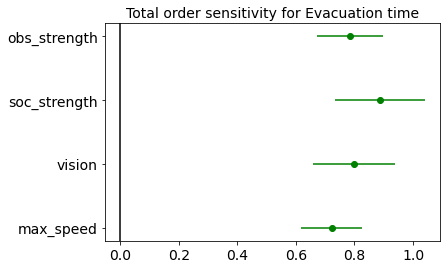

In [9]:
sobol_analysis(data[0])

Mean exit time


{'S1': array([ 0.08615277, -0.00910897,  0.13918017,  0.13730517]), 'S1_conf': array([0.114015  , 0.08123299, 0.10615321, 0.12027287]), 'ST': array([0.86368819, 0.79871171, 0.92083214, 0.9447584 ]), 'ST_conf': array([0.13535195, 0.13618205, 0.14991044, 0.16402707])}


<Figure size 400x200 with 0 Axes>

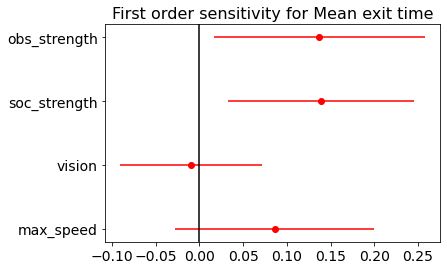

<Figure size 400x200 with 0 Axes>

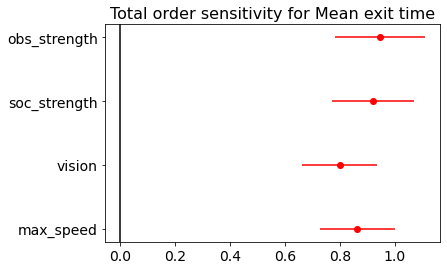

Flow


{'S1': array([ 0.04910025, -0.08034665,  0.06623545,  0.05847776]), 'S1_conf': array([0.1081325 , 0.09621125, 0.1117062 , 0.12724195]), 'ST': array([0.80710042, 0.79166159, 0.89136165, 0.93661667]), 'ST_conf': array([0.12900355, 0.11735894, 0.12330915, 0.11076711])}


<Figure size 400x200 with 0 Axes>

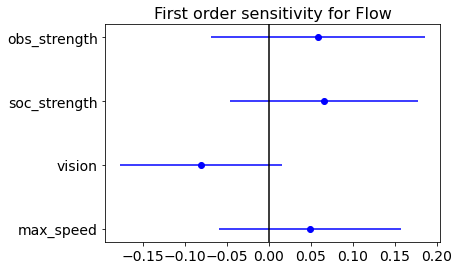

<Figure size 400x200 with 0 Axes>

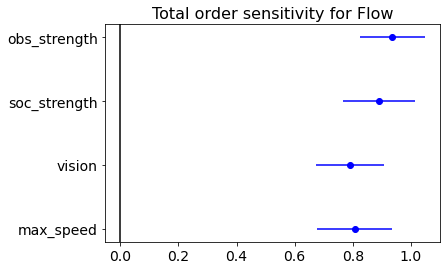

Evacuation time


{'S1': array([ 0.07758769, -0.05218958,  0.09161252,  0.0890563 ]), 'S1_conf': array([0.09426226, 0.07727731, 0.1165278 , 0.1287397 ]), 'ST': array([0.85195228, 0.78456516, 0.90994374, 0.90850911]), 'ST_conf': array([0.13047016, 0.12629112, 0.14115284, 0.13039374])}


<Figure size 400x200 with 0 Axes>

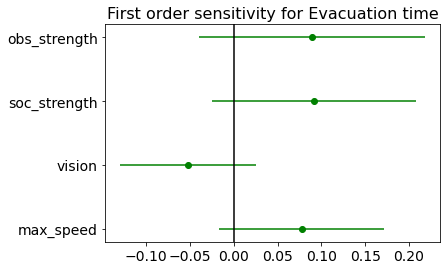

<Figure size 400x200 with 0 Axes>

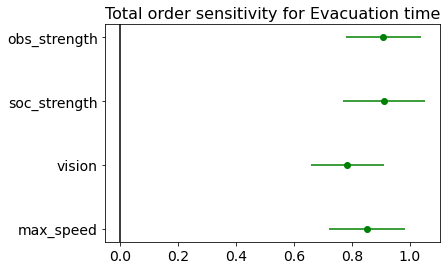

In [11]:
sobol_analysis(data[1])

Mean exit time


{'S1': array([-0.07238205, -0.16974704, -0.03565815, -0.07921778]), 'S1_conf': array([0.14690052, 0.13748508, 0.11682024, 0.14234743]), 'ST': array([0.80825741, 0.85206437, 0.8909184 , 0.96112664]), 'ST_conf': array([0.15486903, 0.13732914, 0.1487826 , 0.1470718 ])}


<Figure size 400x200 with 0 Axes>

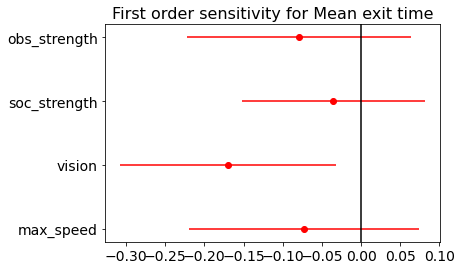

<Figure size 400x200 with 0 Axes>

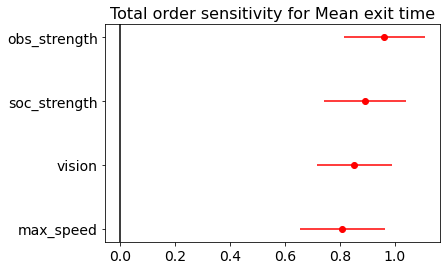

Flow


{'S1': array([-0.12146312, -0.16199815, -0.0532652 , -0.0626183 ]), 'S1_conf': array([0.11800194, 0.11531542, 0.10727117, 0.12972833]), 'ST': array([0.76883241, 0.78275035, 0.85023034, 0.87091018]), 'ST_conf': array([0.11350057, 0.11077932, 0.0991296 , 0.11202082])}


<Figure size 400x200 with 0 Axes>

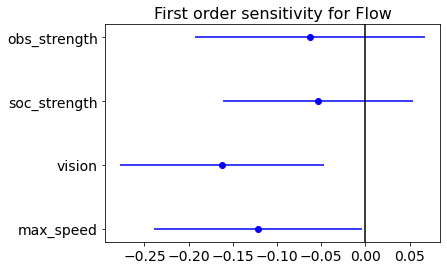

<Figure size 400x200 with 0 Axes>

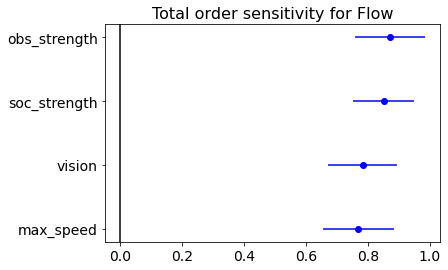

Evacuation time


{'S1': array([-0.12270768, -0.1730563 , -0.07184543, -0.0954653 ]), 'S1_conf': array([0.12603453, 0.12502399, 0.13110932, 0.136741  ]), 'ST': array([0.8102067 , 0.82308908, 0.86657198, 0.9118556 ]), 'ST_conf': array([0.14149463, 0.12892124, 0.13305472, 0.1497167 ])}


<Figure size 400x200 with 0 Axes>

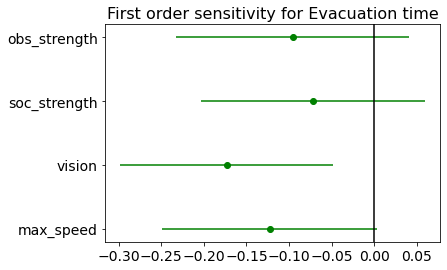

<Figure size 400x200 with 0 Axes>

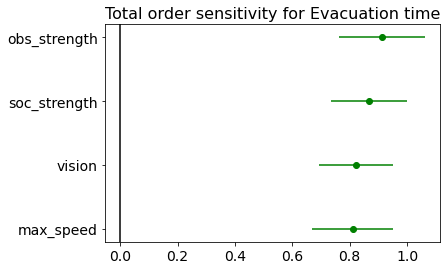

In [12]:
sobol_analysis(data[2])

Mean exit time


{'S1': array([0.07830502, 0.03426133, 0.1250064 , 0.24604252]), 'S1_conf': array([0.12215947, 0.12053938, 0.1127765 , 0.12669446]), 'ST': array([0.77964104, 0.82893167, 0.82022868, 0.92904669]), 'ST_conf': array([0.15289531, 0.13381115, 0.17099971, 0.15337359])}


<Figure size 400x200 with 0 Axes>

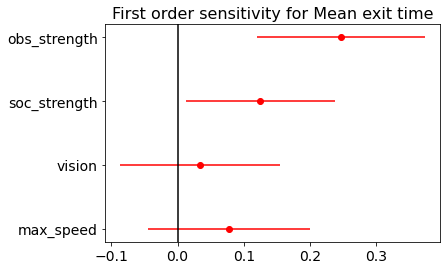

<Figure size 400x200 with 0 Axes>

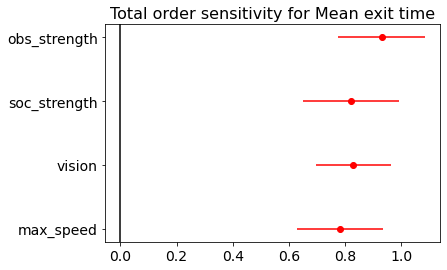

Flow


{'S1': array([1.23048689e-01, 2.02701645e-04, 1.19664732e-01, 2.33284397e-01]), 'S1_conf': array([0.10656599, 0.11674166, 0.11184738, 0.12291259]), 'ST': array([0.7697702 , 0.77544389, 0.79539921, 0.91071016]), 'ST_conf': array([0.1204956 , 0.10884461, 0.1171889 , 0.13396984])}


<Figure size 400x200 with 0 Axes>

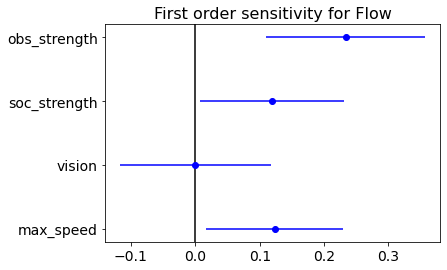

<Figure size 400x200 with 0 Axes>

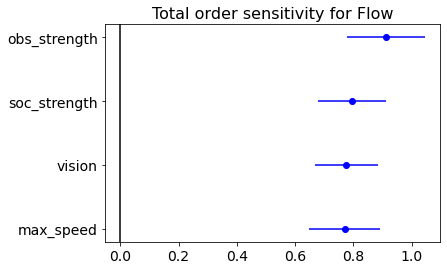

Evacuation time


{'S1': array([0.11394406, 0.00287581, 0.12746457, 0.22779382]), 'S1_conf': array([0.09770413, 0.10491553, 0.12750573, 0.11726584]), 'ST': array([0.73233924, 0.77314134, 0.75977708, 0.88903977]), 'ST_conf': array([0.15387693, 0.15077769, 0.13716912, 0.15334785])}


<Figure size 400x200 with 0 Axes>

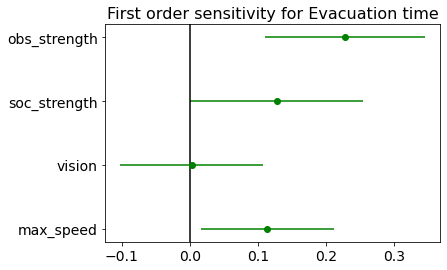

<Figure size 400x200 with 0 Axes>

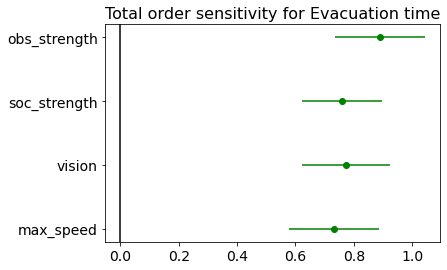

In [13]:
sobol_analysis(data[3])

Mean exit time


{'S1': array([ 0.00854308, -0.018298  ,  0.05727137,  0.31377643]), 'S1_conf': array([0.11290961, 0.10690687, 0.13912419, 0.14143268]), 'ST': array([0.82408376, 0.99941061, 1.00957185, 1.02303978]), 'ST_conf': array([0.17064282, 0.2226909 , 0.20864158, 0.17854201])}


<Figure size 400x200 with 0 Axes>

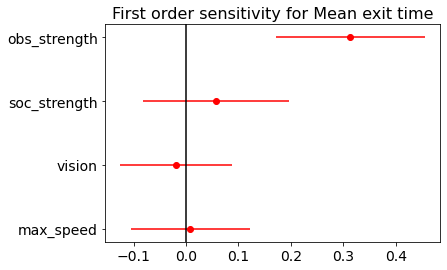

<Figure size 400x200 with 0 Axes>

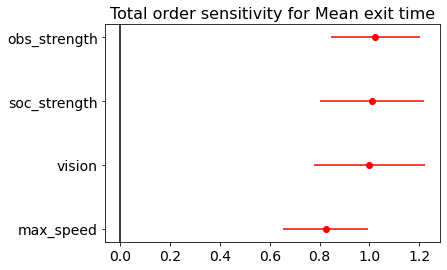

Flow


{'S1': array([ 0.03833913, -0.0172056 ,  0.06710702,  0.20972792]), 'S1_conf': array([0.12080769, 0.12433267, 0.12782657, 0.1288386 ]), 'ST': array([0.78894354, 0.83085132, 0.88767398, 0.92171197]), 'ST_conf': array([0.12871526, 0.11920943, 0.13652298, 0.1082759 ])}


<Figure size 400x200 with 0 Axes>

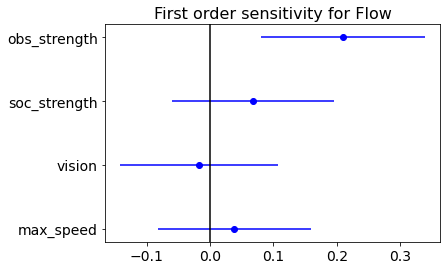

<Figure size 400x200 with 0 Axes>

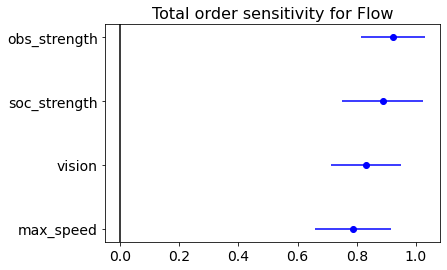

Evacuation time


{'S1': array([ 0.04267749, -0.02431507,  0.08062241,  0.25636756]), 'S1_conf': array([0.14182001, 0.12927588, 0.15217877, 0.12234162]), 'ST': array([0.87350206, 0.89845268, 0.95467829, 0.94088531]), 'ST_conf': array([0.19258371, 0.16258755, 0.16758105, 0.14729929])}


<Figure size 400x200 with 0 Axes>

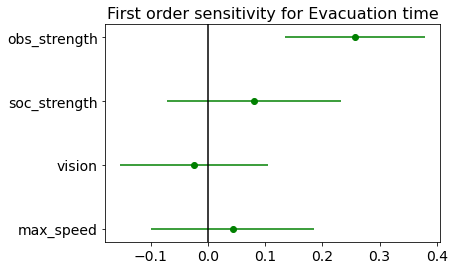

<Figure size 400x200 with 0 Axes>

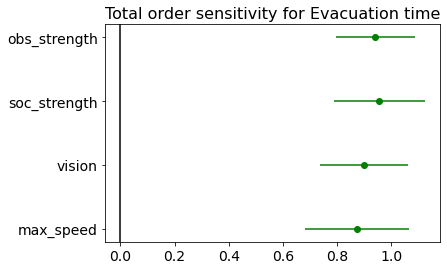

In [14]:
sobol_analysis(data[4])